🚀 To enable GPU acceleration: \
1️⃣ Select “Runtime” from the top menu \
2️⃣ Click on “Change runtime type” \
3️⃣ In the “Hardware accelerator” dropdown, select “GPU” \
4️⃣ Click “Save”

❗WARNING❗ This notebook requires access to your Google Drive in order to run. It's necessary to store code, datasets and models.

In [1]:
# Mount the drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
# Update pip and setuptools
%%python -m pip install -U pip
%pip install --upgrade setuptools

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 9.7 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 23.1.2
    Uninstalling pip-23.1.2:
      Successfully uninstalled pip-23.1.2


In [ ]:
# Restart the runtime
import os
os.kill(os.getpid(), 9)

In [5]:
# Clone the project
%cd /content/gdrive/MyDrive
!git clone https://github.com/YehorManevych/ViT

/content/gdrive/MyDrive
fatal: destination path 'ViT' already exists and is not an empty directory.


In [3]:
# Install all the modules
%pip install --no-cache-dir -r /content/gdrive/MyDrive/ViT/requirements.txt

  Obtaining dependency information for torchinfo from https://files.pythonhosted.org/packages/72/25/973bd6128381951b23cdcd8a9870c6dcfc5606cb864df8eabd82e529f9c1/torchinfo-1.8.0-py3-none-any.whl.metadata
  Obtaining dependency information for torchmetrics from https://files.pythonhosted.org/packages/fa/86/264f2a30d7cdd2f7e93dcca840b588c002e1631d4dfc1fd6ffa4bb497d23/torchmetrics-1.1.2-py3-none-any.whl.metadata
  Obtaining dependency information for lightning-utilities>=0.8.0 from https://files.pythonhosted.org/packages/46/ee/8641eeb6a062f383b7d6875604e1f3f83bd2c93a0b4dbcabd3150b32de6e/lightning_utilities-0.9.0-py3-none-any.whl.metadata
  Obtaining dependency information for jedi>=0.16 from https://files.pythonhosted.org/packages/8e/46/7e3ae3aa2dcfcffc5138c6cef5448523218658411c84a2000bf75c8d3ec1/jedi-0.19.0-py2.py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 764.8/764.8 kB 18.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 116.8 MB/s eta 0:0

In [ ]:
# Restart the runtime
import os
os.kill(os.getpid(), 9)

# Create the replica of ViT and compare it's performance to the reference model

/content/gdrive/MyDrive/ViT
Using device: cuda
Using device: cuda
Creating datasets
Creating datasets
File size is 1557161267 bytes


Downloading:   0%|          | 0/1486 [00:00<?, ?it/s]

Archive is downloaded! /content/gdrive/MyDrive/ViT/datasets/imagenette2.tgz
Extracting the archive
Archive is extracted to /content/gdrive/MyDrive/ViT/datasets/imagenette2
Formatting Imagenette2 dataset
Renaming train
Renaming test
Imagenette2 is ready! /content/gdrive/MyDrive/ViT/datasets/imagenette2_format


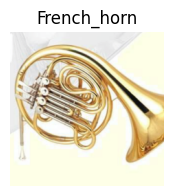

Creating the reference model


Downloading: "https://download.pytorch.org/models/vit_b_16-c867db91.pth" to /root/.cache/torch/hub/checkpoints/vit_b_16-c867db91.pth
100%|██████████| 330M/330M [00:01<00:00, 241MB/s]


Evaluating the reference model


Evaluating:   0%|          | 0/62 [00:00<?, ?it/s]

{'Accuracy': tensor(0.9299), 'Loss': tensor(0.0052), 'Precision': tensor(0.1176), 'Recall': tensor(0.1091)}
Precision and Recall are low because the model is only evaluated on a suabset of IMAGENET classes


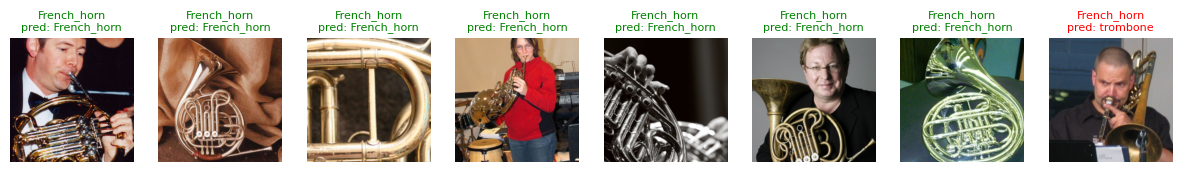

Creating the replicated model
Layer (type (var_name))                       Kernel Shape              Input Shape               Output Shape              Param #
ViT (ViT)                                     --                        [1, 3, 224, 224]          [1, 1000]                 768
├─Conv2d (conv_proj)                          [16, 16]                  [1, 3, 224, 224]          [1, 768, 14, 14]          590,592
├─Flatten (flatten)                           --                        [1, 768, 14, 14]          [1, 768, 196]             --
├─Encoder (encoder)                           --                        [1, 197, 768]             [1, 197, 768]             151,296
│    └─Dropout (dropout)                      --                        [1, 197, 768]             [1, 197, 768]             --
│    └─Sequential (layers)                    --                        [1, 197, 768]             [1, 197, 768]             --
│    │    └─EncoderBlock (0)                  --                 

Evaluating:   0%|          | 0/62 [00:00<?, ?it/s]

{'Accuracy': tensor(0.9299), 'Loss': tensor(0.0053), 'Precision': tensor(0.1176), 'Recall': tensor(0.1091)}
Precision and Recall are low because the model is only evaluated on a suabset of IMAGENET classes


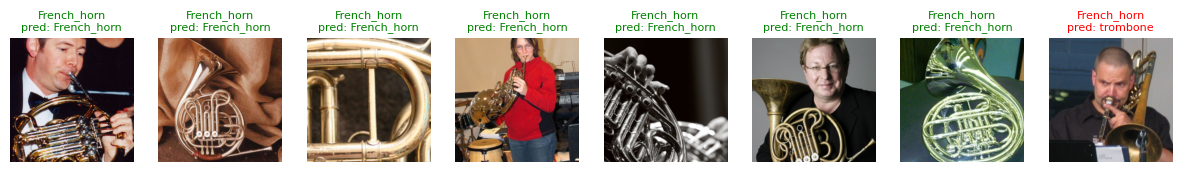

Saving the replicated modet
Model is saved to /content/gdrive/MyDrive/ViT/models/2023-09-05_18.09.45_ViT_93%_.pth


In [ ]:
%cd /content/gdrive/MyDrive/ViT
%run replication.ipynb

# Fine-tune the replicated model on CIFAR-10

/content/gdrive/MyDrive/ViT
Using device: cuda
Loading CIFAR-10 dataset
Files already downloaded and verified
Created 1563 train batches of size 32
Files already downloaded and verified
Created 313 test batches of size 32
Loading CIFAR-10 dataset
Files already downloaded and verified
Created 1563 train batches of size 32
Files already downloaded and verified
Created 313 test batches of size 32


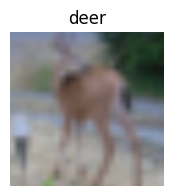

Creating the replicated model
Loading last saved ViT model
Loading model from /content/gdrive/MyDrive/ViT/models/2023-09-05_18.09.45_ViT_93%_.pth
Freezing the model and swapping it's classification head
Fine-tuning the replicated model


Epochs:   0%|          | 0/5 [00:00<?, ?it/s]

Epoch 0


Batches:   0%|          | 0/1563 [00:00<?, ?it/s]

Evaluating:


Evaluating:   0%|          | 0/313 [00:00<?, ?it/s]

Train: Accuracy = 0.928, Loss = 0.007, Precision = 0.928, Recall = 0.928
Test: Accuracy = 0.943, Loss = 0.006, Precision = 0.943, Recall = 0.943

Model is saved to /content/gdrive/MyDrive/ViT/models/2023-09-11_15.13.50_ViT_94%_e0.pth


Epoch 1


Batches:   0%|          | 0/1563 [00:00<?, ?it/s]

Evaluating:


Evaluating:   0%|          | 0/313 [00:00<?, ?it/s]

Train: Accuracy = 0.949, Loss = 0.005, Precision = 0.949, Recall = 0.949
Test: Accuracy = 0.946, Loss = 0.005, Precision = 0.946, Recall = 0.946

Model is saved to /content/gdrive/MyDrive/ViT/models/2023-09-11_15.27.36_ViT_95%_e1.pth


Epoch 2


Batches:   0%|          | 0/1563 [00:00<?, ?it/s]

Evaluating:


Evaluating:   0%|          | 0/313 [00:00<?, ?it/s]

Train: Accuracy = 0.955, Loss = 0.004, Precision = 0.955, Recall = 0.955
Test: Accuracy = 0.947, Loss = 0.005, Precision = 0.948, Recall = 0.947

Model is saved to /content/gdrive/MyDrive/ViT/models/2023-09-11_15.41.20_ViT_95%_e2.pth


Epoch 3


Batches:   0%|          | 0/1563 [00:00<?, ?it/s]

Evaluating:


Evaluating:   0%|          | 0/313 [00:00<?, ?it/s]

Train: Accuracy = 0.958, Loss = 0.004, Precision = 0.958, Recall = 0.958
Test: Accuracy = 0.950, Loss = 0.005, Precision = 0.950, Recall = 0.950

Model is saved to /content/gdrive/MyDrive/ViT/models/2023-09-11_15.55.10_ViT_95%_e3.pth


Epoch 4


Batches:   0%|          | 0/1563 [00:00<?, ?it/s]

Evaluating:


Evaluating:   0%|          | 0/313 [00:00<?, ?it/s]

Train: Accuracy = 0.960, Loss = 0.004, Precision = 0.960, Recall = 0.960
Test: Accuracy = 0.951, Loss = 0.005, Precision = 0.951, Recall = 0.951

Model is saved to /content/gdrive/MyDrive/ViT/models/2023-09-11_16.08.59_ViT_95%_e4.pth




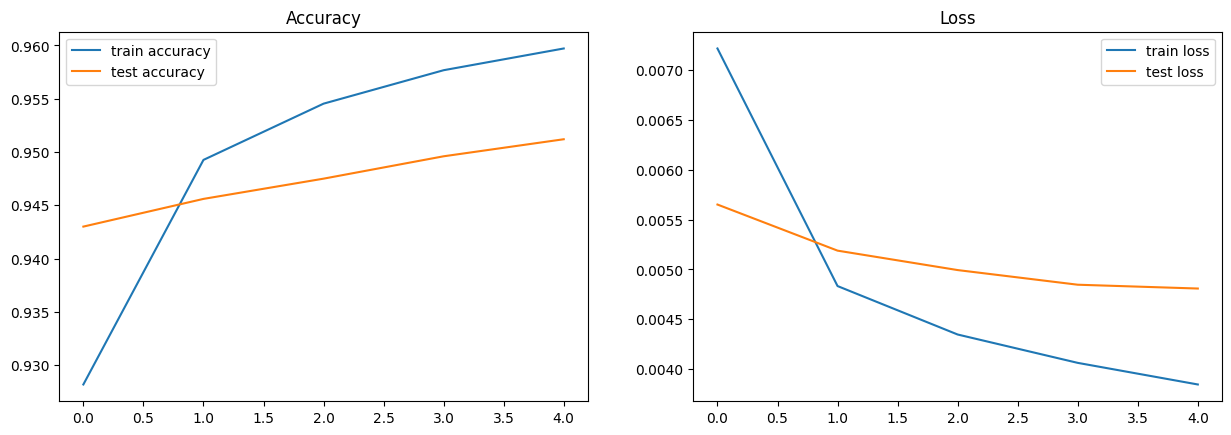

Model is saved to /content/gdrive/MyDrive/ViT/models/2023-09-11_16.09.06_ViT_95%_FT_CIFAR.pth


In [17]:
%cd /content/gdrive/MyDrive/ViT
%run fine_tuning.ipynb